In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Train sets
X_train = pd.read_csv('./Datasets/x_train.csv')
y_train = pd.read_csv('./Datasets/y_train.csv')

# Validation sets
X_valid = pd.read_csv('./Datasets/x_valid.csv')
y_valid = pd.read_csv('./Datasets/y_valid.csv')

# Test sets
X_test = pd.read_csv('./Datasets/x_test.csv')
y_test = pd.read_csv('./Datasets/y_test.csv')

#### Base ExtraTreesClassifier with Performance Metrics

Performance Metric for Extra Trees Classifier on Validation Set
Validation Accuracy: 0.84465667311412
Precision: 0.6706642066420664
Recall: 0.43927492447129907
F1 Score: 0.5308506754289887
AUC: 0.8505548055064613


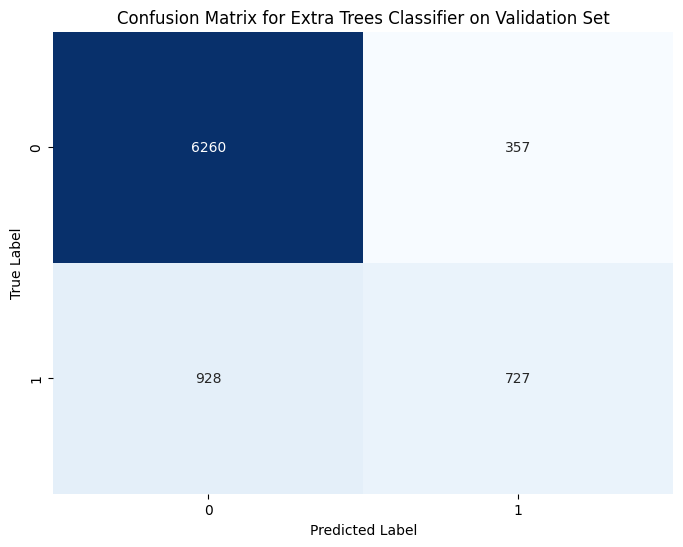

-----------------------------------------------------------------
Performance Metric for Extra Trees Classifier on Testing Set
Validation Accuracy: 0.8468326885880078
Precision: 0.6744815148782687
Recall: 0.45223700120918986
F1 Score: 0.5414404632645676
AUC: 0.698844399667756


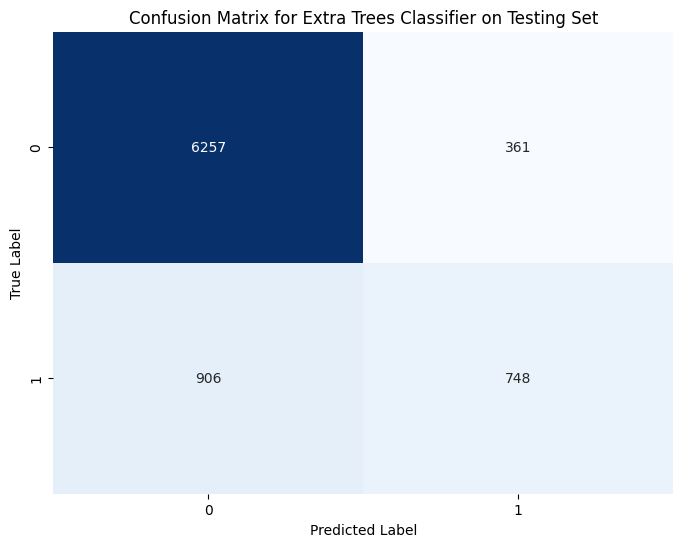

In [3]:
model = 'Extra Trees Classifier'

# Create an ExtraTreesClassifier 
extra_trees_classifier = ExtraTreesClassifier(random_state=0)

#### Parameters of Base ExtraTreesClassifier fier(random_state=0)
extra_trees_classifier.fit(X_train, y_train)

# Predictions for model on validation & testing set
y_valid_pred = extra_trees_classifier.predict(X_valid)
y_test_pred = extra_trees_classifier.predict(X_test)

# Performance metrics on Validation Set
set_type = 'Validation'
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
y_valid_prob = extra_trees_classifier.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_valid_prob)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")  
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=extra_trees_classifier.classes_, yticklabels=extra_trees_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("-----------------------------------------------------------------")

# Performance metrics on Testing Set
set_type = 'Testing'
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
y_test_prob = extra_trees_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_pred)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}") 
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=extra_trees_classifier.classes_, yticklabels=extra_trees_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Parameters of Base ExtraTreesClassifier 

In [4]:
extra_trees_classifier.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Tuning for ExtraTreesClassifier Model with Performance Metrics 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   3.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   3.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   3.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=  11.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=  11.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=  11.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=  10.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=  10.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=None, min_samples_leaf=15, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=None, min_samples_leaf=15, min_samples_split=10, n_estimators=50; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=None, min_samples_leaf=15, min_samples_split=10, n_estimators=50; total time=   2.3s
[CV] END bootstrap=False, max_depth=3, max_features=None, min_samples_leaf=15, min_samples_split=10, n_estimators=50; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=None, min_samples_leaf=15, min_samples_split=10, n_estimators=50; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   5.8s
[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   5.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=  27.2s
[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=  27.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=  27.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=100; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   3.7s
[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   3.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=  24.3s
[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=5, min_samples_split=15, n_estimators=200; total time=  24.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   5.9s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   5.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   6.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   7.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   5.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=50; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   2.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   2.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  27.5s
[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  27.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=100; total time=   8.1s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   2.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  28.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  28.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  28.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.8s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.7s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.6s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   5.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.8s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.9s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.7s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   4.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s
[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   8.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   7.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   7.9s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=  12.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=  12.4s
[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=  12.3s
[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=200; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   9.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   9.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=  12.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=  12.8s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=  12.9s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=20, min_samples_split=2, n_estimators=200; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=  13.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=  13.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=  13.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=  12.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=  12.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=  11.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=  12.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=  12.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=  21.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=  21.9s
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=  21.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=  21.8s
[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=  12.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=200; total time=  21.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=  13.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=  14.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=  18.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=  18.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=  17.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=  18.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=  18.1s
[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   4.0s
[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   3.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   4.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=7, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   7.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=   9.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=   8.9s
[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=   8.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=log2, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=   9.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   8.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   8.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   7.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=5, n_estimators=50; total time=   4.4s
[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=5, n_estimators=50; total time=   4.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=100; total time=   5.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklea

[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=5, n_estimators=50; total time=   4.3s
[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=5, n_estimators=50; total time=   4.4s
[CV] END bootstrap=True, max_depth=7, max_features=None, min_samples_leaf=20, min_samples_split=5, n_estimators=50; total time=   4.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   6.4s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   3.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   3.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   6.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   6.3s
[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   6.2s
[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=20, n_estimators=200; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   3.3s
[CV] END bootstrap=True, max_depth=7, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=100; total time=   3.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=3, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   5.5s
[CV] END bootstrap=True, max_depth=3, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   5.4s
[CV] END bootstrap=True, max_depth=3, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   5.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   3.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=3, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   5.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=3, max_features=None, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   5.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.8s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.9s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  23.5s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  23.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  23.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  23.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=20, min_samples_split=10, n_estimators=200; total time=  23.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=  10.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=  10.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=  10.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   4.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=   9.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=2, n_estimators=200; total time=   9.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   6.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   6.2s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   6.1s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=7, max_features=log2, min_samples_leaf=20, min_samples_split=20, n_estimators=200; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=15, n_estimators=200; total time=   6.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=15, n_estimators=200; total time=   6.3s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=15, n_estimators=200; total time=   6.0s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=15, min_samples_split=2, n_estimators=50; total time=   5.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=15, min_samples_split=2, n_estimators=50; total time=   5.5s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=15, min_samples_split=2, n_estimators=50; total time=   5.7s
[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=15, min_samples_split=2, n_estimators=50; total time=   5.6s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=20, min_samples_split=15, n_estimators=200; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=5, max_features=None, min_samples_leaf=15, min_samples_split=2, n_estimators=50; total time=   5.7s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   6.7s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   6.8s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=200; total time=   6.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   7.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50; total time=   2.6s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   7.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50; total time=   2.4s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   7.1s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50; total time=   2.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   7.2s
[CV] END bootstrap=False, max_depth=15, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=100; total time=   7.3s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   1.2s


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   1.3s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   1.2s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50; total time=   1.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   8.1s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   8.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   8.0s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=200; total time=   7.7s
[CV] END bootstrap=True, max_depth=15, max_feat

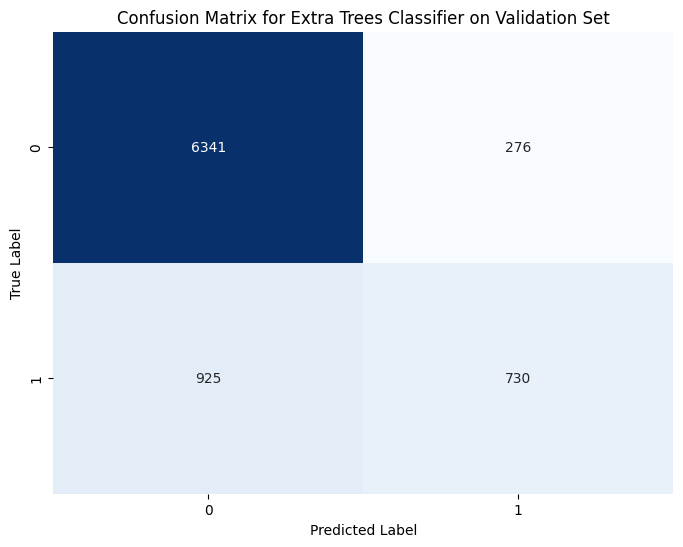

-----------------------------------------------------------------
Performance Metric for Extra Trees Classifier on Testing Set
Validation Accuracy: 0.8574709864603481
Precision: 0.7382146439317954
Recall: 0.4449818621523579
F1 Score: 0.5552621652206714
AUC: 0.7027719827534228


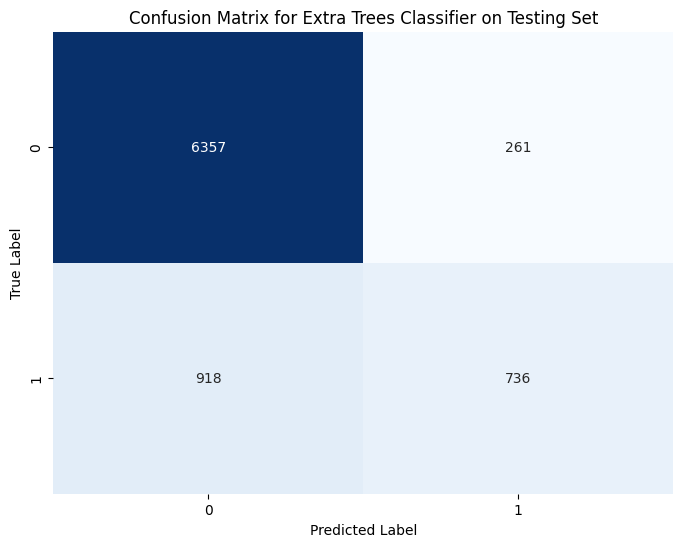

In [5]:
# Create an Random Forest Classifier
extra_trees_classifier = ExtraTreesClassifier(random_state=0)

# Hyperparameter grid to search
param_dist = {
    'n_estimators': [50, 100, 200],           # Number of trees
    'max_depth': [3, 5, 7, 10, 15],             # Maximum depth of the trees (discrete values)
    'min_samples_split': [2, 5, 10, 15, 20],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5, 10, 15, 20],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'bootstrap': [True, False],                  # Whether bootstrap samples are used
}
# Random Search
random_search = RandomizedSearchCV(
    estimator=extra_trees_classifier,
    param_distributions=param_dist,
    n_iter=50,            # Number of random combinations to try
    scoring='f1',    # Use an appropriate metric for your problem
    cv=5,                 # 5-fold cross-validation
    verbose=2,
    n_jobs=-1             # Use all available CPU cores
)
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best Model after RandomSearch
best_extra_trees_classifier = random_search.best_estimator_
best_extra_trees_classifier.fit(X_train, y_train)

# Predictions for model on validation & testing set
y_valid_pred = best_extra_trees_classifier.predict(X_valid)
y_test_pred = best_extra_trees_classifier.predict(X_test)

# Performance metrics on Validation Set
set_type = 'Validation'
accuracy = accuracy_score(y_valid, y_valid_pred)
precision = precision_score(y_valid, y_valid_pred)
recall = recall_score(y_valid, y_valid_pred)
f1 = f1_score(y_valid, y_valid_pred)
y_valid_prob = best_extra_trees_classifier.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, y_valid_prob)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")  
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_valid, y_valid_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=best_extra_trees_classifier.classes_, yticklabels=best_extra_trees_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print("-----------------------------------------------------------------")

# Performance metrics on Testing Set
set_type = 'Testing'
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
y_test_prob = best_extra_trees_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_test_pred)
print(f'Performance Metric for {model} on {set_type} Set')
print(f"Validation Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}") 
print(f"AUC: {auc}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=best_extra_trees_classifier.classes_, yticklabels=best_extra_trees_classifier.classes_)
plt.title(f"Confusion Matrix for {model} on {set_type} Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Parameters of Tuned ExtraTreesClassifier

In [6]:
best_extra_trees_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}